## How to Query Data from the MAAP via Python Client

Supported collections can be subsetted through the MAAP Query Service. At the time of writing (03/22/2021), the GEDI Calibration/Validation Field Survey Dataset is the only valid dataset for this service. However, more data will be made available for querying as the MAAP team continues to develop expanded services for the platform. Users can interact with the service through the MAAP Python client.

First, we import the `json` module, import the `MAAP` package, and create a new MAAP class.

In [1]:
# import the json module
import json
# import the MAAP package
from maap.maap import MAAP
# create MAAP class
maap = MAAP()

### How to Use `maap.executequery()`

We use the `executeQuery()` function to return a response object, containing the server's response to our HTTP request. This object can be used to view the response headers, access the raw data of the response, or parse the response as a JavaScript Object Notation (JSON). JSON is a data-interchange format, designed to be easy for humans to read and write.

#### `executeQuery` Parameters

- `src` - a dictionary-like object specifying the dataset to query. Currently, the only option is as follows:
```
{ 
    "Collection": { 
        "ShortName": "GEDI Cal/Val Field Data_1", 
        "VersionId": "2" 
    } 
  }
```
- `query` - a dictionary-like object specifying the parameters for query. A dictionary can include `bbox`, `where`, `fields`, and `table`:
    - `bbox` - a list of floating point numbers identifying a bounding box of geographic coordinates.
    - `where` - a dictionary-like object which maps fields to required values within a query. 
    - `fields` - a list of fields to return, a subset of all fields available for the corresponding dataset.
    - `table` - the name of the table to query. At this time, the only valid options are "tree" or "plot" corresponding to tables in the GEDI Cal/Val database.
- `poll_results` - a parameter which must be `True` to use the `timeout` parameter.
- `timeout` - the waiting period for a response. This indicates the maximum number of seconds to wait for a response. Note that timeout has a default value of '180' and requires that the `poll_results` parameter be `True`. Depending on the request, it may be necessary to modify the timeout to make sure the server has enough time to process the request.
- `wait_interval` - number of seconds to wait between each poll for results. `wait_interval` is only used if `poll_results`=`True` (default 0.5).
-`max_redirects` - the maximum number of redirects to follow when scheduling an execution (default 5).


### Query Searching for a Project Name

In this example, we create a dictionary containing a `Collection` key, which contains entries for `ShortName` and `VersionId`. This is used later in the `executeQuery()` function. For this example, we use the GEDI Calibration/Validation Field Survey Dataset collection. More information about dictionaries in Python can be found here - https://www.techbeamers.com/python-dictionary/. 

In [2]:
# create dictionary with a "Collection" key containing short name and version ID entries:
collection  = { 
  "Collection": { 
      "ShortName": "GEDI Cal/Val Field Data_1", 
      "VersionId": "2" 
  } 
}

We also create a function (in this example named `fetch_results`) which utilizes the `executeQuery` function to return results of queries. Within this function, we use the `executeQuery` function to get a response object. Within the `executeQuery` function, our `collection` dictionary is assigned to `src`, a dictionary-like object specifying the dataset to query. We also have the query used in the argument assigned to `query`, a dictionary-like object which specifies the parameters for the query. We set `timeout` to the timeout used in the argument (default is 180 seconds) and set `poll_results` to `True` in order to set the maximum waiting period for a response. We can check the ‘Content-Type’ header of our response to see the content type of the response. In the following code, the ‘Content-Type’ header is checked to determine if it is JSON or not, in order to set an appropriate variable to return.

In [3]:
def fetch_results(query={}, timeout=180):
    """
    Function which utilizes the `executeQuery` function to return the results of queries.
    """
    # use the executeQuery() function to get a response object
    response = maap.executeQuery(
      # dictionary-like object specifying the dataset to query 
      src = collection,
      # dictionary-like object specifying the parameters for query
      query = query,
      # must be True to use the timeout parameter
      poll_results = True,
      # max waiting period for a response in seconds
      timeout = timeout
    )
    # if the 'Content-Type' is json, creates variable with json version of the response
    if (response.headers.get("Content-Type") == "application/json"):
        data = response.json()
    # if the 'Content-Type' is not json, creates variable with unicode content of the response
    else:
        data = response.text
    # returns `data` as json string
    return json.loads(data)

Now that we have our collection dictionary and our function to return the results of queries, let's use a print statement to display the first project name from a query which utilizes the `bbox` and `fields` parameters within `query`. The `bbox` parameter is a GeoJSON-compliant bounding box ([minX, minY, maxX, maxY]) which is used to filter data spatially. GeoJSON is a format for encoding geographic data structures. More information about the bounding box can be found in the standard specification of the GeoJSON format, located here - https://tools.ietf.org/html/rfc7946#section-5. The `fields` parameter is a list of fields to return in the query response. In this case, we assign 'project' to `fields`.

In [4]:
# prints the first project name in the results of the query as a json string
print(json.dumps(fetch_results({"bbox": [9.31, 0.53, 9.32, 0.54], "fields": ["project"]})[0], indent=2))

{
  "project": "gabon_mondah"
}


### Inspecting a Single Observation

In the previous example, we displayed the project name for a result from our query, but let's say we wished to see all of the fields and their associated values for a result. In this example, we make another query, this time only specifying the bounding box. The print statement displays the variables for a single observation. A list of the variables and their units and descriptions can be found [here](https://maap-project.readthedocs.io/en/latest/query/gedi_calval_data_doc.html).

In [5]:
# prints the fields with values for the first result in the results of the query as a json string
print(json.dumps(fetch_results({"bbox": [9.315, 0.535, 9.32, 0.54]})[0], indent=2))

{
  "project": "gabon_mondah",
  "plot": "NASA11",
  "subplot": "1",
  "survey": "AfriSAR_ESA_2016",
  "private": 0,
  "date": "2016-02-01",
  "region": "Af",
  "vegetation": "TropRF",
  "map": 3083.93471636915,
  "mat": 25.6671529098763,
  "pft.modis": "Evergreen Broadleaf trees",
  "pft.name": null,
  "latitude": 0.538705025207016,
  "longitude": 9.31982893597376,
  "p.sample": 0,
  "p.stemmap": 0,
  "p.origin": "C",
  "p.orientation": -2.18195751718555,
  "p.shape": "R",
  "p.majoraxis": 100,
  "p.minoraxis": 100,
  "p.geom": "POLYGON ((535537.75 59601.25, 535627.75 59590.5, 535642.25 59489.25, 535543 59498.5, 535537.75 59601.25, 535537.75 59601.25))",
  "p.epsg": 32632,
  "p.area": 10000,
  "p.mindiam": 0.01,
  "sp.geom": "POLYGON((535537.510093 59494.109258, 535537.526710 59519.109253, 535562.526704 59519.092636, 535562.510088 59494.092642, 535537.510093 59494.109258))",
  "sp.ix": 1,
  "sp.iy": 4,
  "sp.shape": "R",
  "sp.area": 625,
  "sp.mindiam": 0.01,
  "pai": null,
  "lai": 

### Query Using Multiple Parameters With `where`

In the output of the previous example, we can see the field `"species"`. Let's say we are interested in finding observations for the `"gabon_mondah"` project within the same bounding box as the previous example which have the same species. We can do this using `where`, a dictionary-like object which maps fields to required values within a query. To help demonstrate how to use `where`, we can create a new function (in this example named `species_query`) to print the number of results as well as the first result, adding on to our previous `fetch_results` function which utilized the `executeQuery` function.

In [6]:
def species_query(query = {}, timeout = 180):
    """
    Function which utilizes the `fetch_results` (and thereby `executeQuery`) function and prints the number of results 
    as well as the first result.
    """
    # set `data` to results of query
    data = fetch_results(query = query, timeout = timeout)
    # get the number of results within `data`
    num_results = len(data)
    # if `data` is not null and contains at least one result, the number of results and the first result are printed
    if((data is not None) and (num_results > 0)):
        first_result = data[0]
        print(f"Number of results: {num_results}")
        print(f"First result: {json.dumps(first_result, indent=2)}")  
    # else prints "No result"
    else:
        print(num_results)
        print("No result")  

Let's call the `species_query` function. We enter the same bounding box values as in the previous example. This time around, we enter `where` in our query and set the `project` as `gabon_mondah` and the `species` as `Coelocaryon sp.`. We can set a list of fields to return in query response using `fields`. For this example, we can choose to return only the project, family, species, latitude, and longitude values. After completing our query, we can manually set the timeout value (in this example '200').

In [7]:
# call `species_query` function with bounding box values, where the project is "gabon_mondah", 
# the species is "Aucoumea klaineana", fields include "project", "family", "species", "latitude", and "longitude",
# and the timeout value is 200 (use the scrollbar to see the entire function call)
species_query({"bbox": [9.315, 0.535, 9.32, 0.54], "where": {"project": "gabon_mondah", "species": "Coelocaryon sp."}, "fields": ["project", "family", "species", "latitude", "longitude"]}, 200)

Number of results: 10
First result: {
  "project": "gabon_mondah",
  "family": "Myristicaceae",
  "species": "Coelocaryon sp.",
  "latitude": 0.538705025207016,
  "longitude": 9.31982893597376
}


We now see that there are many results and the latitude and longitude coordinates for the first result. To see this information for Aucoumea klaineana, we can copy the code from the above cell, changing the `species` to `Aucoumea klaineana` within the function argument.

In [8]:
# call `species_query` function with bounding box values, where the project is "gabon_mondah", 
# the species is "Coelocaryon sp.", fields include "project", "family", "species", "latitude", and "longitude",
# and the timeout value is 200 (use the scrollbar to see the entire function call)
species_query({"bbox": [9.315, 0.535, 9.32, 0.54], "where": {"project": "gabon_mondah", "species": "Aucoumea klaineana"}, "fields": ["project", "family", "species", "latitude", "longitude"]}, 200)

Number of results: 49
First result: {
  "project": "gabon_mondah",
  "family": "Burseraceae",
  "species": "Aucoumea klaineana",
  "latitude": 0.538705025207016,
  "longitude": 9.31982893597376
}


### Using `executeQuery` to Vizualize Plots and Trees

Now that we know how to print the query results of the collection, let's look at examples of vizualizing the information from query results. The first time you run this, you will need to install `folium`. `folium` allows us to visualize data on an interactive map. With `folium` installed, you will then import the `folium` library. Also import `matplotlib.pyplot`, which allows us to generate interactive plots

In [9]:
# captures the output so you don't have to see all the pip install logging
#%%capture
# installs folium
#!pip install folium

In [10]:
# import folium library and matplotlib.pyplot
import folium
import matplotlib.pyplot as plt

#### Plot Project Plots

Now we can begin plotting all the plots for a given project. For this example, we'll check out the `australia_ausplotsforests` project. We can query the plot table by using our `fetch_results` helper function. This time, we set the `table` parameter. `table` is the name of the table to query. The GEDI Cal/Val database has tables for "tree" and "plot" so let's set `table` to "plot". We can then preview our results.

In [11]:
# set project and query for all the plots in that project
project = 'australia_ausplotsforests'
results = fetch_results({
    "bbox": [-180, 90, 180, -90],
    "where": {
        "project": project
    },
    "fields": ["latitude", "longitude", "plot"],
    "table":"plot"
}, 1000)
# print first 10 results
results[0:10]

[{'latitude': -31.2421, 'longitude': 152.4609, 'plot': 'NSFNNC002'},
 {'latitude': -31.2421, 'longitude': 152.4609, 'plot': 'NSFNNC002'},
 {'latitude': -31.2421, 'longitude': 152.4609, 'plot': 'NSFNNC002'},
 {'latitude': -31.2421, 'longitude': 152.4609, 'plot': 'NSFNNC002'},
 {'latitude': -31.2421, 'longitude': 152.4609, 'plot': 'NSFNNC002'},
 {'latitude': -31.2421, 'longitude': 152.4609, 'plot': 'NSFNNC002'},
 {'latitude': -31.2421, 'longitude': 152.4609, 'plot': 'NSFNNC002'},
 {'latitude': -31.2421, 'longitude': 152.4609, 'plot': 'NSFNNC002'},
 {'latitude': -31.2421, 'longitude': 152.4609, 'plot': 'NSFNNC002'},
 {'latitude': -31.2421, 'longitude': 152.4609, 'plot': 'NSFNNC002'}]

#### Create Project Plots Dictionary

Now we can create a dictionary for the project plots from our results.

In [12]:
# create dictionary for project plots, where each plot has lat/lon info
project_plots = {}
keys = [ 'latitude', 'longitude' ]
for result in results:
    project_plots[result['plot']] = { key: result[key] for key in keys }

To center our map more easily and plot trees later on, we can set a variable to the first project plot to be used for centering the map.

In [13]:
# Select the first plot, just to center the map easily
first_plot = list(project_plots.keys())[0]
first_plot

'NSFNNC002'

#### Map the Plots

Now we can create a map and place the plot points onto it. First we will set variables for the map's location center and starting zoom level. Then we will use the `folium.Map` function to create a map which displays "Stamen Terrain" tiles with our location center and starting zoom level. Next, we will create a loop using the `folium.Marker` function to add markers to the map at the latitude and longitude for each plot and have popup text displaying each plot's name. Lastly, we display the map in order to interact with it. 

In [14]:
# set location center for map
center = [ project_plots[first_plot]['latitude'], project_plots[first_plot]['longitude'] ]
# set zoom level, note that depending on the project,
# you may wish to increase the zoom level
zoom = 3
# create a map with Folium and Leaflet.js
m = folium.Map(location=center, tiles="Stamen Terrain", zoom_start = zoom)
# Add markers to map for each plot in `project_plots`
for plot in project_plots.items():
    folium.Marker(
        [plot[1]['latitude'], plot[1]['longitude']],
        popup = f"plot: {plot[0]}"
    ).add_to(m)
# display map
m

The map has zoom in and zoom out buttons, can be dragged with a mouse, and displays markers which can be clicked on to display their popup text.

#### Plot Trees

Now let's look at plotting trees for the first plot of the designated project. We construct another query with our `fetch_results` helper function. This time, we query for fields containing plant height, UTM coordinates, and elevation as well as set the `table` parameter to "tree".

In [15]:
# query for trees for the first plot of the project
results = fetch_results({
    "bbox": [-180, 90, 180, -90],
    "where": {
        "project": project,
        "plot": first_plot
    },
    # h.t -> total height of plant from ground to highest leaf
    # x -> easting UTM coordinate
    # y -> northing UTM coordinate
    # z -> elevation relative to geoid coordinate
    "fields": [ "h.t", "x", "y", "z"],
    "table": "tree"
}, 1000)

#### Determine the Number and Height of Trees

To see the number of trees in the list of results, we use the `len` function within a formatted print statement. Since not all of the results contain heights, lets check how many trees with height data exist by creating a new variable set to the results with heights and use the `len` function within a formatted print statement again. Also, we can set variables to contain the heights, x and y values contained within our results to be used when plotting the trees.

In [16]:
# print number of trees in results
print(f"Number of trees: {len(results)}")
# print number of trees with heights
heights = [r["h.t"] for r in results if r["h.t"] is not None]
print(f"Number of trees with heights: {len(heights)}")
# set variables to the heights, x and y values contained in the results
hts = [r['h.t'] for r in results] 
xs = [r['x'] for r in results]
ys = [r['y'] for r in results]

Number of trees: 520
Number of trees with heights: 117


#### Plot the Trees

With our variables for tree heights, x and y coordinate values, let's use the `plt.scatter` function to create a scatter plot with a title and labels for the UTM coordinates of the trees. Lastly, let's also create a histogram using `plt.hist` to visualize the distribution of tree heights. Here we also include some code to adjust the display colors and add labels and a title.

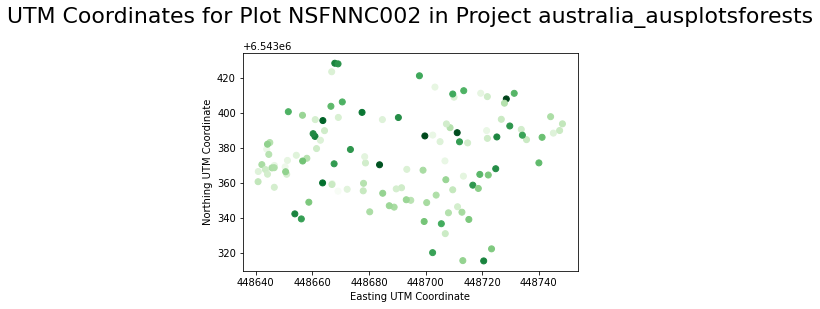

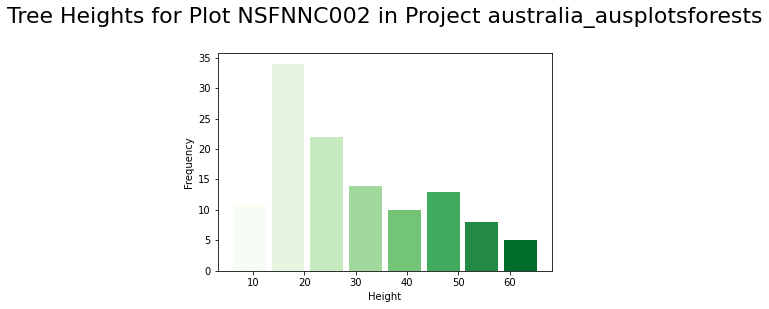

In [17]:
# create scatter plot with x and y values
plt.scatter(xs, ys, c=hts, cmap="Greens")
# add labels and title
plt.xlabel('Easting UTM Coordinate')
plt.ylabel('Northing UTM Coordinate')
plt.title(f"UTM Coordinates for Plot {first_plot} in Project {project}\n", fontsize=22)
plt.show()
# adjust display colors
cm = plt.cm.Greens
nbins = 8
# create histogram for tree heights
n, bins, patches = plt.hist(x=heights, bins=nbins, rwidth=0.85)
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/nbins))
# add labels and title
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title(f"Tree Heights for Plot {first_plot} in Project {project}\n", fontsize=22)
plt.show()
